In [2]:
# Our numerical workhorse
import numpy as np
import scipy.special
import pandas as pd

# Import pyplot for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Seaborn, useful for graphics
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

In [4]:
# load the data
df = pd.read_csv('data/130315_10_minute_intervals.csv',delimiter=',')
#take a look at the data
df

,fish,genotype,day,light,CLOCK,zeit,activity
0,FISH1,het,0,True,9.819,9.819,4.500000e+00
1,FISH1,het,0,True,9.986,9.986,6.883383e-15
2,FISH1,het,0,True,10.153,10.153,6.883383e-15
3,FISH1,het,0,True,10.319,10.319,6.883383e-15
4,FISH1,het,0,True,10.486,10.486,6.883383e-15
5,FISH1,het,0,True,10.653,10.653,6.883383e-15
6,FISH1,het,0,True,10.819,10.819,6.883383e-15
7,FISH1,het,0,True,10.986,10.986,6.883383e-15
8,FISH1,het,0,True,11.153,11.153,6.883383e-15
9,FISH1,het,0,True,11.319,11.319,1.300000e+00


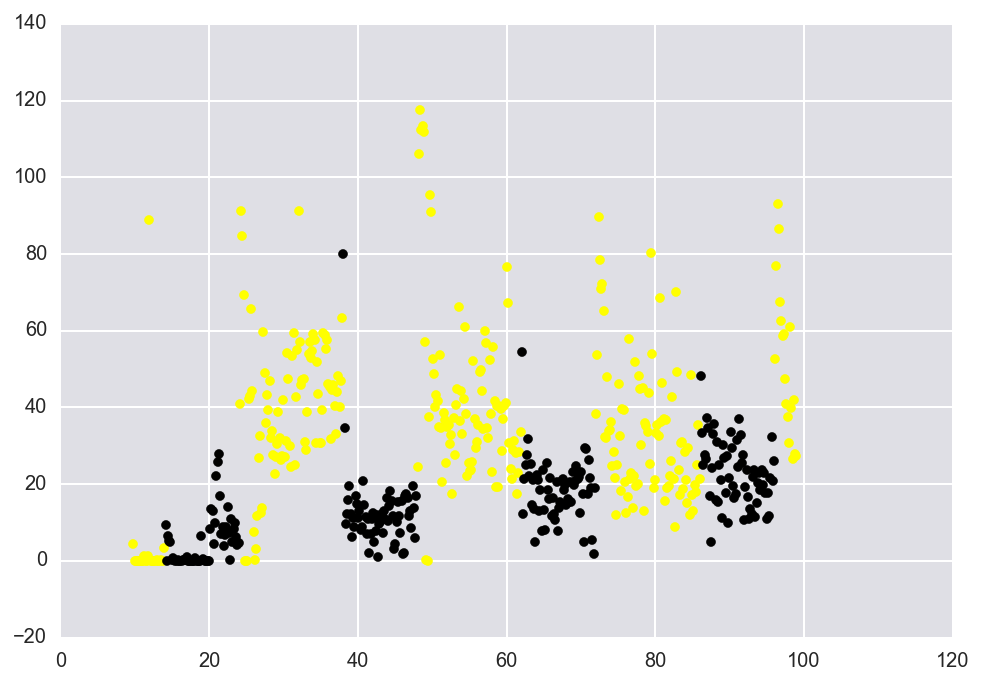

In [52]:
# Isolate wing data from Fish1
fish1 = (df['fish'] == 'FISH1')

#fish1 = df[fish1]['activity']['CLOCK'].dropna()
fish1_df = pd.DataFrame({'activity': df[fish1]['activity'], 'zeit': df[fish1]['zeit'], 'light': df[fish1]['light']})
#fish1_df['activity'] = np.log(fish1_df['activity'])
fish1_df
light_inds = fish1_df['light']
dark_inds = ~light_inds
plt.scatter(fish1_df[light_inds]['zeit'],fish1_df[light_inds]['activity'], color = 'yellow')
plt.scatter(fish1_df[dark_inds]['zeit'],fish1_df[dark_inds]['activity'], color = 'black')

#fish1 = np.log(fish1)
#fish1
#bin_edges = np.linspace(min(fish1['activity']), fish1(df['activity']), 15)
#plot it
#_ = plt.scatter(fish1, df['CLOCK'], alpha=0.6)
